The [U.S. Energy Information Administration](https://www.eia.gov/) has numerous datasets pertaining to energy usage, by source and by state, available on its website.

I'd like to scrape these datasets from the PDFs made available on their website (blah) and do the following:

1. Scrape the tables from the following datasets, at minimum:
 a. https://www.eia.gov/state/seds/sep_sum/html/pdf/rank_use_gdp.pdf
 
 b. https://www.eia.gov/state/seds/sep_sum/html/pdf/rank_use.pdf
 
 c. https://www.eia.gov/state/seds/sep_sum/html/pdf/rank_use_source.pdf
 
 d. https://www.eia.gov/state/seds/sep_sum/html/pdf/rank_use_capita.pdf
2. Tidy the data
3. Answer these questions:
 a. Which states, in rank order, use the most of each energy source per capita?
 
 b. Which states, in rank order, produce the most of each energy source per capita?
 
 c. Additional questions here.

#### EIA Data Page
https://www.eia.gov/state/seds/seds-data-complete.php#StatisticsIndicators

## Import Modules

In [2]:
#Math and DataFrames
import numpy as np
import scipy.stats
import scipy.special
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

## Consumption by Energy Source

_All units in billions BTU_

Unfortunately, none of these datasets are tidy. I will need to write a few lines of code to do the following:

- States should be the row, repeated for every year
- Have two columns for each state; the year and the reported value.

In [95]:
coal_use = pd.read_excel("../../data/use_energy_source.xlsx", sheet_name="Coal", skiprows=[0, 1])
coal_use_tidy = pd.melt(coal_use, id_vars=['State'])
coal_use_tidy = coal_use_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
coal_use_tidy['type'] = 'coal'
coal_use_tidy['boolean'] = 'consumption'
coal_use_tidy.head(), coal_use_tidy.tail()

(  State  year  billions BTU  type      boolean
 0    AK  1960          7189  coal  consumption
 1    AL  1960        395400  coal  consumption
 2    AR  1960           356  coal  consumption
 3    AZ  1960           210  coal  consumption
 4    CA  1960         35903  coal  consumption,
      State  year  billions BTU  type      boolean
 3063    WA  2018         61166  coal  consumption
 3064    WI  2018        362077  coal  consumption
 3065    WV  2018        661760  coal  consumption
 3066    WY  2018        455748  coal  consumption
 3067    US  2018      13249958  coal  consumption)

In [96]:
natgas_use = pd.read_excel("../../data/use_energy_source.xlsx", sheet_name="Natural Gas", skiprows=[0, 1])
natgas_use_tidy = pd.melt(natgas_use, id_vars=['State'])
natgas_use_tidy = natgas_use_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
natgas_use_tidy['type'] = 'natural gas'
natgas_use_tidy['boolean'] = 'consumption'
natgas_use_tidy.head(), natgas_use_tidy.tail()

(  State  year  billions BTU         type      boolean
 0    AK  1960          2034  natural gas  consumption
 1    AL  1960        190706  natural gas  consumption
 2    AR  1960        222202  natural gas  consumption
 3    AZ  1960        140275  natural gas  consumption
 4    CA  1960       1301826  natural gas  consumption,
      State  year  billions BTU         type      boolean
 3063    WA  2018        334776  natural gas  consumption
 3064    WI  2018        565280  natural gas  consumption
 3065    WV  2018        222889  natural gas  consumption
 3066    WY  2018        174859  natural gas  consumption
 3067    US  2018      31086360  natural gas  consumption)

In [97]:
petroleum_use = pd.read_excel("../../data/use_energy_source.xlsx", sheet_name="Petroleum", skiprows=[0, 1])
petroleum_use_tidy = pd.melt(petroleum_use, id_vars=['State'])
petroleum_use_tidy = petroleum_use_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
petroleum_use_tidy['type'] = 'petroleum'
petroleum_use_tidy['boolean'] = 'consumption'
petroleum_use_tidy.head(), petroleum_use_tidy.tail()

(  State  year  billions BTU       type      boolean
 0    AK  1960         45410  petroleum  consumption
 1    AL  1960        236010  petroleum  consumption
 2    AR  1960        148055  petroleum  consumption
 3    AZ  1960        121344  petroleum  consumption
 4    CA  1960       1836912  petroleum  consumption,
      State  year  billions BTU       type      boolean
 3063    WA  2018        801282  petroleum  consumption
 3064    WI  2018        543067  petroleum  consumption
 3065    WV  2018        218584  petroleum  consumption
 3066    WY  2018        162553  petroleum  consumption
 3067    US  2018      36901589  petroleum  consumption)

In [98]:
nuclear_use = pd.read_excel("../../data/use_energy_source.xlsx", sheet_name="Nuclear", skiprows=[0, 1])
nuclear_use_tidy = pd.melt(nuclear_use, id_vars=['State'])
nuclear_use_tidy = nuclear_use_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
nuclear_use_tidy['type'] = 'nuclear'
nuclear_use_tidy['boolean'] = 'consumption'
nuclear_use_tidy.head(), nuclear_use_tidy.tail()

(  State  year  billions BTU     type      boolean
 0    AK  1960             0  nuclear  consumption
 1    AL  1960             0  nuclear  consumption
 2    AR  1960             0  nuclear  consumption
 3    AZ  1960             0  nuclear  consumption
 4    CA  1960             1  nuclear  consumption,
      State  year  billions BTU     type      boolean
 3063    WA  2018        101502  nuclear  consumption
 3064    WI  2018        105900  nuclear  consumption
 3065    WV  2018             0  nuclear  consumption
 3066    WY  2018             0  nuclear  consumption
 3067    US  2018       8438068  nuclear  consumption)

In [99]:
renewable_use = pd.read_excel("../../data/use_energy_source.xlsx", sheet_name="Total Renewable Energy", skiprows=[0, 1])
renewable_use_tidy = pd.melt(renewable_use, id_vars=['State'])
renewable_use_tidy = renewable_use_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
renewable_use_tidy['type'] = 'renewables'
renewable_use_tidy['boolean'] = 'consumption'
renewable_use_tidy.head(), renewable_use_tidy.tail()

(  State  year  billions BTU        type      boolean
 0    AK  1960          6800  renewables  consumption
 1    AL  1960        112809  renewables  consumption
 2    AR  1960         48104  renewables  consumption
 3    AZ  1960         36181  renewables  consumption
 4    CA  1960        270161  renewables  consumption,
      State  year  billions BTU        type      boolean
 3063    WA  2018        956795  renewables  consumption
 3064    WI  2018        199559  renewables  consumption
 3065    WV  2018         53701  renewables  consumption
 3066    WY  2018         54917  renewables  consumption
 3067    US  2018      11281563  renewables  consumption)

In [100]:
frames_use = [coal_use_tidy, natgas_use_tidy, petroleum_use_tidy, nuclear_use_tidy, renewable_use_tidy]
use_concat = pd.concat(frames_use, ignore_index=True)
use_concat.head(), use_concat.tail()

(  State  year  billions BTU  type      boolean
 0    AK  1960          7189  coal  consumption
 1    AL  1960        395400  coal  consumption
 2    AR  1960           356  coal  consumption
 3    AZ  1960           210  coal  consumption
 4    CA  1960         35903  coal  consumption,
       State  year  billions BTU        type      boolean
 15335    WA  2018        956795  renewables  consumption
 15336    WI  2018        199559  renewables  consumption
 15337    WV  2018         53701  renewables  consumption
 15338    WY  2018         54917  renewables  consumption
 15339    US  2018      11281563  renewables  consumption)

#### Let's take a look at some of these "USE" datasets in the form of graphs.

For each energy source, I would like to plot an lmplot, where each year is on the x-axis and each value is on the y-axis. I would like to color the lines for each state, which may lead to a chaotic mess.

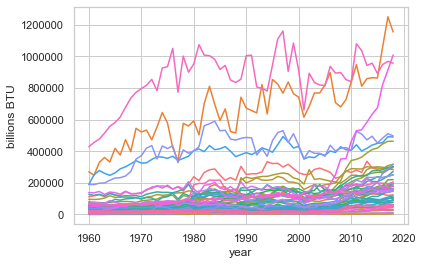

In [41]:
sns.lineplot(x="year", y="billions BTU",
             hue="State",
             data=renewable_use_tidy, legend=False)

This plot is ugly, in part, because the line for the US data obscures the lines for the individual states. Let's remove all rows with US values, and then revisualize, and then make the state appear on hover instead.

In [34]:
renewable_use_tidy2 = renewable_use_tidy[renewable_use_tidy['State'] != 'US']
renewable_use_tidy2.tail()

,State,year,billions BTU
3062,VT,2018,44241
3063,WA,2018,956795
3064,WI,2018,199559
3065,WV,2018,53701
3066,WY,2018,54917


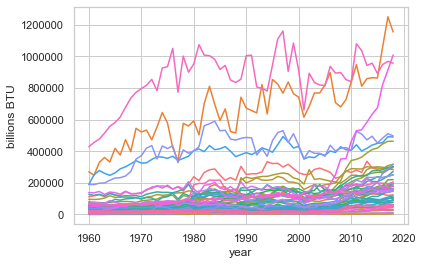

In [40]:
g = sns.lineplot(x="year", y="billions BTU",
             hue="State",
             data=renewable_use_tidy2, legend=False)

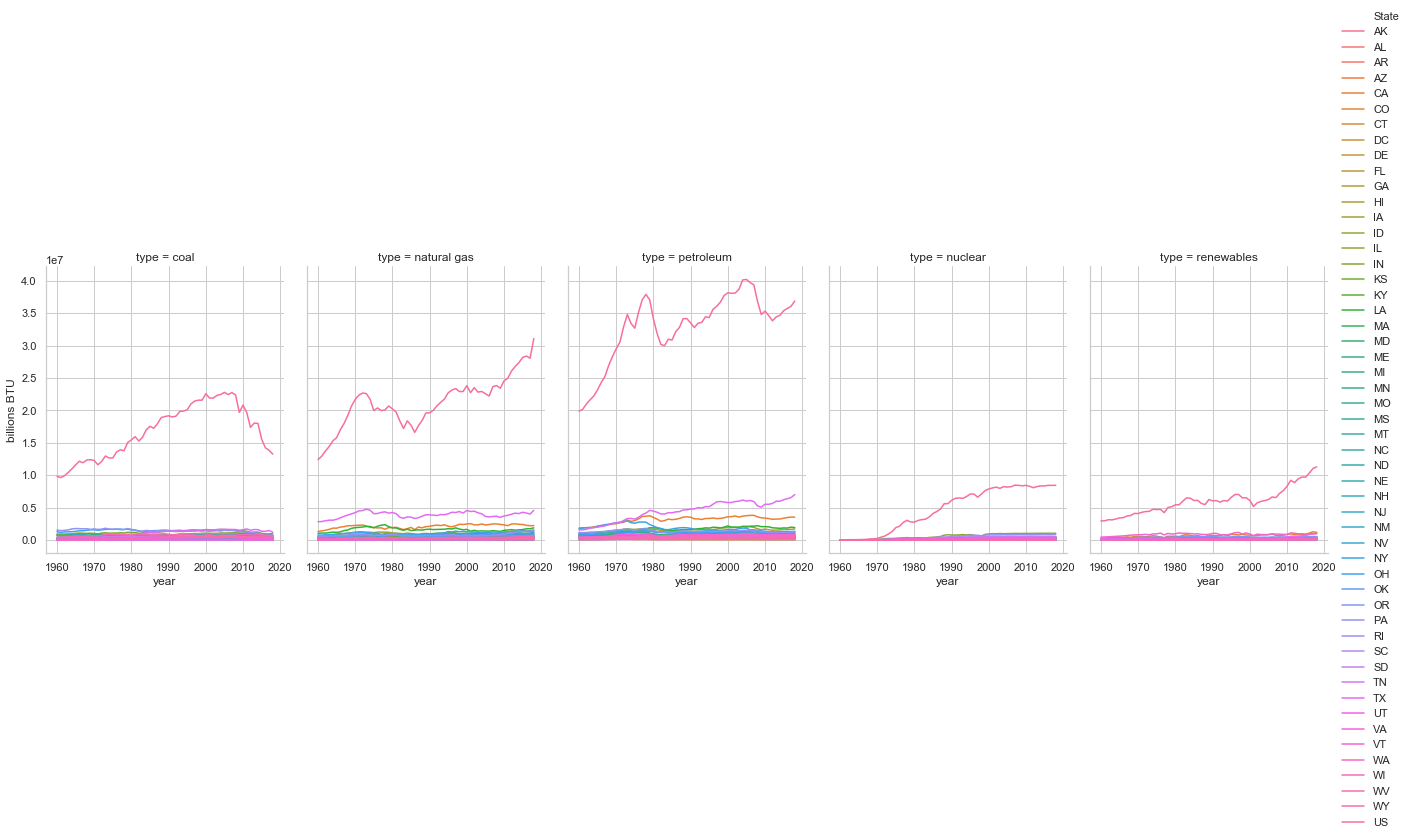

In [81]:
sns.relplot(x="year", y="billions BTU",
            hue="State", col="type",
            height=5, aspect=.75,
            kind="line", legend="full", data=use_concat)

## Production by Source

_All units in billions BTU_

In [101]:
coal_prod = pd.read_excel("../../data/prod_btu_ff_nu.xlsx", sheet_name="Coal", skiprows=[0, 1])
coal_prod_tidy = pd.melt(coal_prod, id_vars=['State'])
coal_prod_tidy = coal_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
coal_prod_tidy['type'] = 'coal'
coal_prod_tidy['boolean'] = 'production'
coal_prod_tidy.head(), coal_prod_tidy.tail()

(  State  year  billions BTU  type     boolean
 0    AK  1960         11263  coal  production
 1    AL  1960        318818  coal  production
 2    AR  1960          9178  coal  production
 3    AZ  1960           132  coal  production
 4    CA  1960             0  coal  production,
      State  year  billions BTU  type     boolean
 3063    WA  2018             0  coal  production
 3064    WI  2018             0  coal  production
 3065    WV  2018       2468639  coal  production
 3066    WY  2018       5315953  coal  production
 3067    US  2018      15280478  coal  production)

In [102]:
natgas_prod = pd.read_excel("../../data/prod_btu_ff_nu.xlsx", sheet_name="Natural Gas", skiprows=[0, 1])
natgas_prod_tidy = pd.melt(natgas_prod, id_vars=['State'])
natgas_prod_tidy = natgas_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
natgas_prod_tidy['type'] = 'natural gas'
natgas_prod_tidy['boolean'] = 'production'
natgas_prod_tidy.head(), natgas_prod_tidy.tail()

(  State  year  billions BTU         type     boolean
 0    AK  1960           248  natural gas  production
 1    AL  1960            93  natural gas  production
 2    AR  1960         57339  natural gas  production
 3    AZ  1960             0  natural gas  production
 4    CA  1960        590504  natural gas  production,
      State  year  billions BTU         type     boolean
 3063    WA  2018             0  natural gas  production
 3064    WI  2018             0  natural gas  production
 3065    WV  2018       2189445  natural gas  production
 3066    WY  2018       1848593  natural gas  production
 3067    US  2018      37575611  natural gas  production)

In [103]:
crudeoil_prod = pd.read_excel("../../data/prod_btu_ff_nu.xlsx", sheet_name="Crude Oil", skiprows=[0, 1])
crudeoil_prod_tidy = pd.melt(crudeoil_prod, id_vars=['State'])
crudeoil_prod_tidy = crudeoil_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
crudeoil_prod_tidy['type'] = 'crude oil'
crudeoil_prod_tidy['boolean'] = 'production'
crudeoil_prod_tidy.head(), crudeoil_prod_tidy.tail()

(  State  year  billions BTU       type     boolean
 0    AK  1960          3242  crude oil  production
 1    AL  1960         42508  crude oil  production
 2    AR  1960        174679  crude oil  production
 3    AZ  1960           423  crude oil  production
 4    CA  1960       1771042  crude oil  production,
      State  year  billions BTU       type     boolean
 3063    WA  2018             0  crude oil  production
 3064    WI  2018             0  crude oil  production
 3065    WV  2018         66292  crude oil  production
 3066    WY  2018        501871  crude oil  production
 3067    US  2018      22889745  crude oil  production)

In [104]:
nuclear_prod = pd.read_excel("../../data/prod_btu_ff_nu.xlsx", sheet_name="Nuclear Electric Power", skiprows=[0, 1])
nuclear_prod_tidy = pd.melt(nuclear_prod, id_vars=['State'])
nuclear_prod_tidy = nuclear_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
nuclear_prod_tidy['type'] = 'nuclear'
nuclear_prod_tidy['boolean'] = 'production'
nuclear_prod_tidy.head(), nuclear_prod_tidy.tail()

(  State  year  billions BTU     type     boolean
 0    AK  1960             0  nuclear  production
 1    AL  1960             0  nuclear  production
 2    AR  1960             0  nuclear  production
 3    AZ  1960             0  nuclear  production
 4    CA  1960             1  nuclear  production,
      State  year  billions BTU     type     boolean
 3063    WA  2018        101502  nuclear  production
 3064    WI  2018        105900  nuclear  production
 3065    WV  2018             0  nuclear  production
 3066    WY  2018             0  nuclear  production
 3067    US  2018       8438068  nuclear  production)

In [105]:
biofuels_prod = pd.read_excel("../../data/prod_btu_re_te.xlsx", sheet_name="Biofuels", skiprows=[0, 1])
biofuels_prod_tidy = pd.melt(biofuels_prod, id_vars=['State'])
biofuels_prod_tidy = biofuels_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
biofuels_prod_tidy['type'] = 'biofuels'
biofuels_prod_tidy['boolean'] = 'production'
biofuels_prod_tidy.head(), biofuels_prod_tidy.tail()

(  State  year  billions BTU      type     boolean
 0    AK  1960             0  biofuels  production
 1    AL  1960             0  biofuels  production
 2    AR  1960             0  biofuels  production
 3    AZ  1960             0  biofuels  production
 4    CA  1960             0  biofuels  production,
      State  year  billions BTU      type     boolean
 3063    WA  2018         10049  biofuels  production
 3064    WI  2018         81904  biofuels  production
 3065    WV  2018             0  biofuels  production
 3066    WY  2018             0  biofuels  production
 3067    US  2018       2396573  biofuels  production)

In [106]:
wood_waste_prod = pd.read_excel("../../data/prod_btu_re_te.xlsx", sheet_name="Wood and Waste", skiprows=[0, 1])
wood_waste_prod_tidy = pd.melt(wood_waste_prod, id_vars=['State'])
wood_waste_prod_tidy = wood_waste_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
wood_waste_prod_tidy['type'] = 'wood waste'
wood_waste_prod_tidy['boolean'] = 'production'
wood_waste_prod_tidy.head(), wood_waste_prod_tidy.tail()

(  State  year  billions BTU        type     boolean
 0    AK  1960          3681  wood waste  production
 1    AL  1960         45681  wood waste  production
 2    AR  1960         37433  wood waste  production
 3    AZ  1960          4013  wood waste  production
 4    CA  1960         82098  wood waste  production,
      State  year  billions BTU        type     boolean
 3063    WA  2018        117704  wood waste  production
 3064    WI  2018        103907  wood waste  production
 3065    WV  2018         12327  wood waste  production
 3066    WY  2018          4901  wood waste  production
 3067    US  2018       2841911  wood waste  production)

In [107]:
other_renewables_prod = pd.read_excel("../../data/prod_btu_re_te.xlsx", sheet_name="Other Renewables", skiprows=[0, 1])
other_renewables_prod_tidy = pd.melt(other_renewables_prod, id_vars=['State'])
other_renewables_prod_tidy = other_renewables_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
other_renewables_prod_tidy['type'] = 'other renewables'
other_renewables_prod_tidy['boolean'] = 'production'
other_renewables_prod_tidy.head(), other_renewables_prod_tidy.tail()

(  State  year  billions BTU              type     boolean
 0    AK  1960          3120  other renewables  production
 1    AL  1960         67128  other renewables  production
 2    AR  1960         10671  other renewables  production
 3    AZ  1960         32169  other renewables  production
 4    CA  1960        188064  other renewables  production,
      State  year  billions BTU              type     boolean
 3063    WA  2018        810927  other renewables  production
 3064    WI  2018         38589  other renewables  production
 3065    WV  2018         33107  other renewables  production
 3066    WY  2018         46550  other renewables  production
 3067    US  2018       6269880  other renewables  production)

In [108]:
total_renewables_prod = pd.read_excel("../../data/prod_btu_re_te.xlsx", sheet_name="Total Renewables", skiprows=[0, 1])
total_renewables_prod_tidy = pd.melt(total_renewables_prod, id_vars=['State'])
total_renewables_prod_tidy = total_renewables_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
total_renewables_prod_tidy['type'] = 'total renewables'
total_renewables_prod_tidy['boolean'] = 'production'
total_renewables_prod_tidy.head(), total_renewables_prod_tidy.tail()

(  State  year  billions BTU              type     boolean
 0    AK  1960          6800  total renewables  production
 1    AL  1960        112809  total renewables  production
 2    AR  1960         48104  total renewables  production
 3    AZ  1960         36181  total renewables  production
 4    CA  1960        270161  total renewables  production,
      State  year  billions BTU              type     boolean
 3063    WA  2018        938680  total renewables  production
 3064    WI  2018        224400  total renewables  production
 3065    WV  2018         45435  total renewables  production
 3066    WY  2018         51450  total renewables  production
 3067    US  2018      11508364  total renewables  production)

In [109]:
total_primary_prod = pd.read_excel("../../data/prod_btu_re_te.xlsx", sheet_name="Total Primary Energy", skiprows=[0, 1])
total_primary_prod_tidy = pd.melt(total_primary_prod, id_vars=['State'])
total_primary_prod_tidy = total_primary_prod_tidy.rename(columns={"variable": "year", "value": "billions BTU"})
total_primary_prod_tidy['type'] = 'total primary'
total_primary_prod_tidy['boolean'] = 'production'
total_primary_prod_tidy.head(), total_primary_prod_tidy.tail()

(  State  year  billions BTU           type     boolean
 0    AK  1960         21554  total primary  production
 1    AL  1960        474228  total primary  production
 2    AR  1960        289299  total primary  production
 3    AZ  1960         36737  total primary  production
 4    CA  1960       2631707  total primary  production,
      State  year  billions BTU           type     boolean
 3063    WA  2018       1040182  total primary  production
 3064    WI  2018        330300  total primary  production
 3065    WV  2018       4769811  total primary  production
 3066    WY  2018       7717867  total primary  production
 3067    US  2018      95692266  total primary  production)

In [110]:
frames_prod = [coal_prod_tidy, natgas_prod_tidy, crudeoil_prod_tidy, nuclear_prod_tidy, biofuels_prod_tidy, wood_waste_prod_tidy, other_renewables_prod_tidy, total_renewables_prod_tidy, total_primary_prod_tidy]
prod_concat = pd.concat(frames_prod, ignore_index=True)
prod_concat.head(), prod_concat.tail()

(  State  year  billions BTU  type     boolean
 0    AK  1960         11263  coal  production
 1    AL  1960        318818  coal  production
 2    AR  1960          9178  coal  production
 3    AZ  1960           132  coal  production
 4    CA  1960             0  coal  production,
       State  year  billions BTU           type     boolean
 27607    WA  2018       1040182  total primary  production
 27608    WI  2018        330300  total primary  production
 27609    WV  2018       4769811  total primary  production
 27610    WY  2018       7717867  total primary  production
 27611    US  2018      95692266  total primary  production)

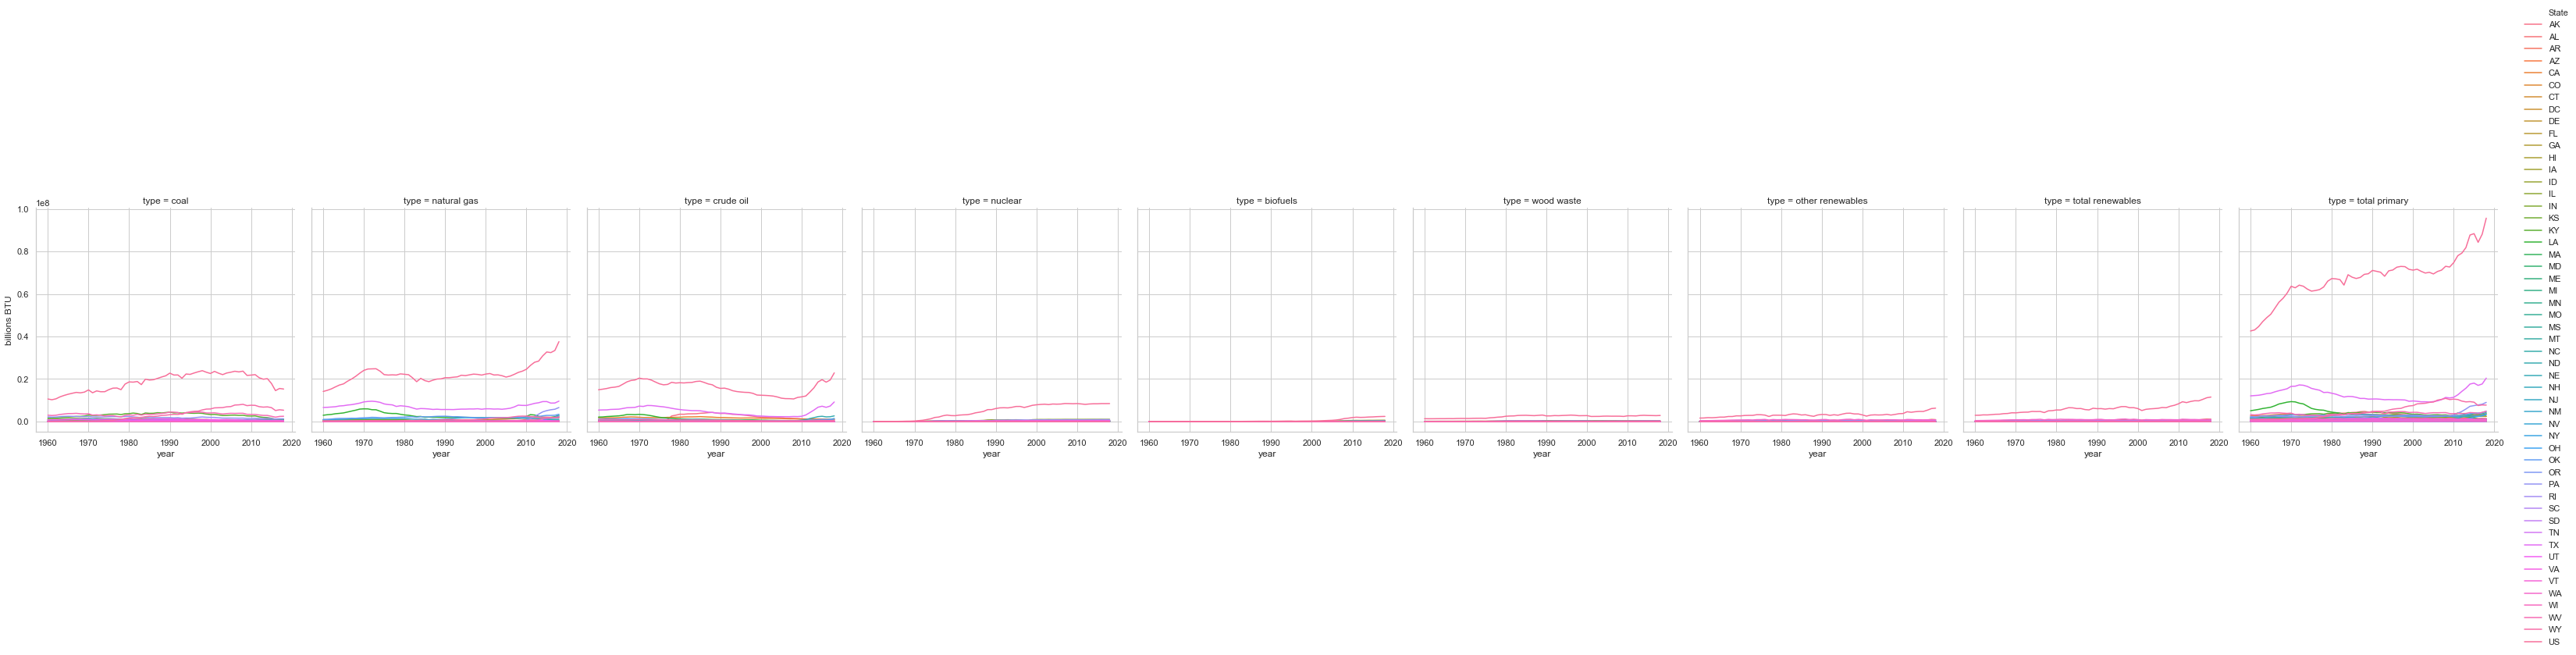

In [94]:
sns.relplot(x="year", y="billions BTU",
            hue="State", col="type",
            height=5,
            kind="line", legend="full", data=prod_concat)

### Goals for Dataset

With these datasets, I hope to build a dashboard in which users can select a state (one of 50 states), and select either "production" or "consumption". Upon selecting their queries, a steamgraph would load that shows each energy source over time. Smooth transition between altered queries.

If users select both "production" and "consumption", I would simply use "total values" to show energy surplus or deficits for each state, with shaded region between the two lines.

Finally, I'd like to make a chloropleth map in which users can explore each energy source, and see how states rank both in terms of consumption and production.

Close the article / exploration by appealing to energy "potential" - in other words, why is renewable energy usage so low, and what potential does each state have for renewables, crude oil, etc.?

### Massaging Data to Meet Goals

To meet these goals, I may need to massage the data into a _single_ .csv or .json file that has an added column, called "category", or something like that, with the options of either "production" or "consumption".

In [ ]:
total_concat = pd.concat()